<a href="https://colab.research.google.com/github/garfield-gray/MachineLearning/blob/main/pytorch/1_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.4.1+cu121'

Text(0, 0.5, 'y')

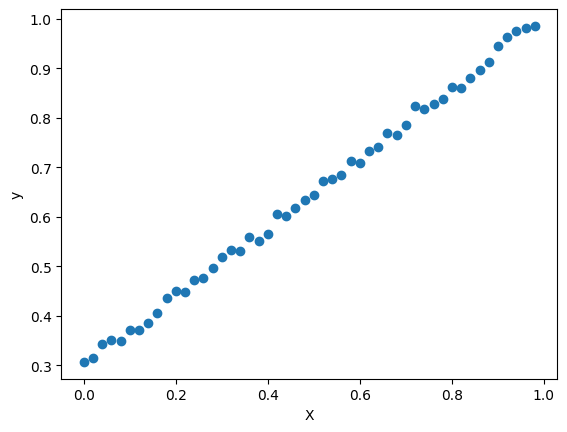

In [70]:
# prompt: we wanna do a simple regression task on torch, put weight and bias and add a normal noise to y and plot it

# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias + torch.randn(X.shape) * 0.01
# y = weight * X + bias
# Plot the data
plt.plot(X.numpy(), y.numpy(), 'o')
plt.xlabel('X')
plt.ylabel('y')


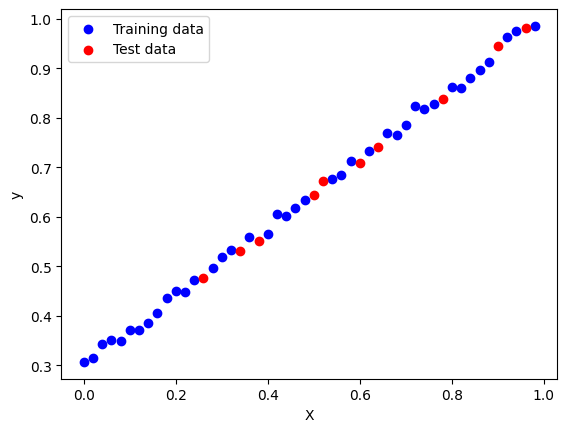

In [71]:
# prompt: split X and y into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Plot the training and test data separately
plt.scatter(X_train.numpy(), y_train.numpy(), c='blue', label='Training data')
plt.scatter(X_test.numpy(), y_test.numpy(), c='red', label='Test data')

plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.show()


In [72]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

In [73]:
model_0 = LinearRegressionModel()
model_0.state_dict()

OrderedDict([('weights', tensor([-2.7249])), ('bias', tensor([1.2747]))])

In [74]:
# the main question
with torch.inference_mode():
    y_preds = model_0(X_test)


In [75]:
y_preds

tensor([[ 0.5663],
        [-0.8507],
        [-0.3602],
        [-1.1777],
        [ 0.3483],
        [-1.3412],
        [-0.1422],
        [-0.0877],
        [-0.4692],
        [ 0.2393]])

In [76]:
y_test

tensor([[0.4774],
        [0.8372],
        [0.7095],
        [0.9459],
        [0.5305],
        [0.9814],
        [0.6727],
        [0.6437],
        [0.7415],
        [0.5519]])

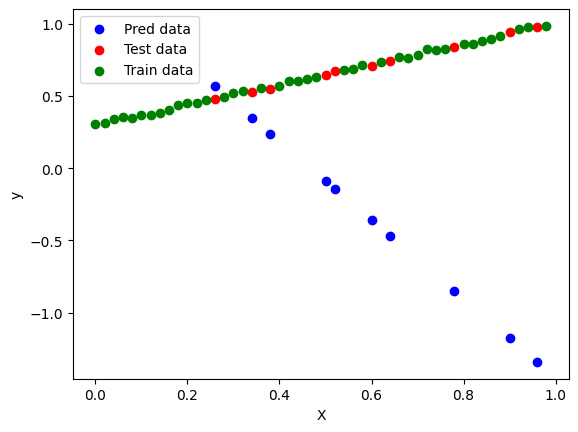

In [77]:
# prompt: scatter y_test and y_pred

# Plot the training and test data separately
plt.scatter(X_test.numpy(), y_preds.numpy(), c='blue', label='Pred data')
plt.scatter(X_test.numpy(), y_test.numpy(), c='red', label='Test data')
plt.scatter(X_train.numpy(), y_train.numpy(), c='green', label='Train data')

plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.show()


In [78]:
import torch
from torch import nn
import torch.optim as optim

# Define the loss function (Mean Squared Error)
loss_fn = nn.MSELoss()

# Define the optimizer (Stochastic Gradient Descent) with learning rate 0.01
optimizer = optim.SGD(model_0.parameters(), lr=0.01)

# Number of epochs (how many times to loop through the dataset)
epochs = 10000

# Training loop
for epoch in range(epochs):
    model_0.train()  # Set the model in training mode (affects things like dropout, though not used here)

    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model_0(X_train)

    # Compute the loss
    loss = loss_fn(y_pred, y_train)

    # Zero the gradients before running the backward pass
    optimizer.zero_grad()

    # Backward pass: Compute gradients of the loss w.r.t. model parameters
    loss.backward()

    # Update the model parameters
    optimizer.step()

    # Print some information every 100 epochs
    if (epoch+1) % 1000 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")

# After training, print the final parameters (weights and bias)
print(f"Trained Weights: {model_0.weights.item()}, Trained Bias: {model_0.bias.item()}")


Epoch 1000/10000, Loss: 0.049747224897146225
Epoch 2000/10000, Loss: 0.0028786216862499714
Epoch 3000/10000, Loss: 0.00023689985391683877
Epoch 4000/10000, Loss: 8.800152136245742e-05
Epoch 5000/10000, Loss: 7.960872608236969e-05
Epoch 6000/10000, Loss: 7.913551235105842e-05
Epoch 7000/10000, Loss: 7.910888234619051e-05
Epoch 8000/10000, Loss: 7.910743443062529e-05
Epoch 9000/10000, Loss: 7.910731801530346e-05
Epoch 10000/10000, Loss: 7.910731801530346e-05
Trained Weights: 0.6991204023361206, Trained Bias: 0.3013070225715637


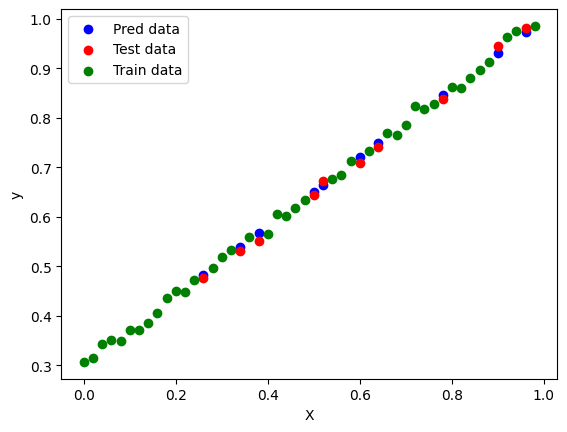

In [79]:
# prompt: scatter y_test and y_pred
y_preds = model_0(X_test)

# Plot the training and test data separately
plt.scatter(X_test.numpy(), y_preds.detach().numpy(), c='blue', label='Pred data')
plt.scatter(X_test.numpy(), y_test.numpy(), c='red', label='Test data')
plt.scatter(X_train.numpy(), y_train.numpy(), c='green', label='Train data')


plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.show()
